# Fundraising Strategies

![](banner_fundraising.jpg)

Data Retrieval | Data Selection | Descriptive Statistics | Synthetic Variables | Cross-Tabulation | Data Visualization

In [1]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)
options(repr.matrix.max.rows=100)
output_size(9,4.5)
                                
PARTY_COLOR = c(DEM=PALETTE[1], REP=PALETTE[2], LIB=PALETTE[4], GRE=PALETTE[3], NON="gray60", IND="gray60", UN="gray60", CON="gray60", OTH="gray60", UNK="gray60")

.................................................... start of document ....................................................

## Situation

* **Role:** Director of Fundraising in California for a US President candidate, 2020. 
* **Business Decision:** What is your fundraising strategy?  Target whom, where, when?
* **Approach:** Explore data re: 2019 donations made to all candidates, use insights to inform your fundraising strategy.
* **Data:** US Federal Election Commission, Contributions by individuals for 2020 election cycle made Jan-Sep 2019.
  * https://www.fec.gov/
  * https://www.fec.gov/data/browse-data/?tab=bulk-data
  * https://www.fec.gov/campaign-finance-data/contributions-individuals-file-description/
  * https://www.fec.gov/updates/reports-due-2020/

## Data

### Retrieve Raw Data

#### Candidates

Retrieve raw data re: candidate names.

In [2]:
data.cn = read.csv("cn.txt", header=FALSE, sep="|")
header = read.csv("cn_header_file.csv", header=FALSE, stringsAsFactor=FALSE)
colnames(data.cn) = header[1,]

size(data.cn)
fmt(data.cn[1:3,], "First few observations:", position="left")

observations,variables
6064,15


CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
H0AK00105,"LAMB, THOMAS",N,2020,AK,H,NA,,N,C00607515,1861 W LAKE LUCILLE DR,,WASILLA,AK,99654
H0AL01055,"CARL, JERRY LEE, JR",REP,2020,AL,H,1,O,C,C00697789,PO BOX 852138,,MOBILE,AL,36685
H0AL01063,"LAMBERT, DOUGLAS WESTLEY III",REP,2020,AL,H,1,O,C,C00701557,7194 STILLWATER BLVD,,SPANISH FORT,AL,36527


Filter for presidential candidates only.

In [3]:
data.cnp = data.cn[(data.cn$CAND_OFFICE=="P") & (data.cn$CAND_ELECTION_YR==2020),]

size(data.cnp)
fmt(length(unique(data.cnp$CAND_NAME)), "# of unique candidates")
fmt(data.cnp[1:3,], "First few observations:", position="left")

observations,variables
1016,15


# of unique candidates
1015


CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
P00000679,"CARROLL, JERRY LEON",NNE,2020,US,P,0,C,N,C00214999,PO BOX 9079,,STOCKTON,CA,95208
P00001099,"MARCINEK, ALOYSIUS R",IND,2020,US,P,0,C,N,,15224 PINE HILL TRAIL,,MIDDLEBURG HTS,OH,44130
P00003244,"WINTERBOTTOM, THOMAS FRANCIS",DEM,2020,US,P,0,C,N,C00549923,"262 KING ST., APT 722",,POTTSTOWN,PA,194645580


Find any duplicated candidate observations (i.e., candidates with more than one candidate ID) - just curious.

In [4]:
data.cnp[data.cnp$CAND_NAME == data.cnp$CAND_NAME[duplicated(data.cnp$CAND_NAME)],]

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
4577,P00010496,"JONES, ARNOLD MATTHEW",DEM,2020,US,P,0,C,N,C00692186,1246 WEST 1000 NORTH,,SALT LAKE CITY,UT,84116
5235,P80002876,"JONES, ARNOLD MATTHEW",DEM,2020,US,P,0,C,N,C00692186,1246 WEST 1000 NORTH,,SALT LAKE CITY,UT,84116


Tally counts of candidates by party.

In [5]:
data.cnp.party = aggregate(CAND_ID ~ CAND_PTY_AFFILIATION, data.cnp, length)
names(data.cnp.party)[2] = "count"
data.cnp.party = data.cnp.party[order(data.cnp.party$count, decreasing=TRUE),]

data.cnp.party$CAND_PTY_AFFILIATION
fmt(data.cnp.party[1:5,], "First few observations:", position="left")

[1] DEM IND REP LIB OTH W   NNE GRE UN  UNK NPA IDP NON AIP     CON IAP DFL COM
[20] LBL APF CIT CRV HRP ICD N/A NAP PAF REF SUS VET ACE AIC AKI AMP EAS FED FHB
[39] GRN GWP KSP NIC NP  POP PPY PRO RTL SLP SOC SWP UST
75 Levels:  ACE ACT AIC AIP AKI AMP APF C CIT CMD CNC COM CON CRV CST ... WTP

CAND_PTY_AFFILIATION,count
DEM,306
IND,204
REP,152
LIB,56
OTH,42


#### Candidate/Committee Associations

Retrieve raw data re: candidate/committee associations.

In [6]:
data.link = read.csv("ccl.txt", header=FALSE, sep="|")
header = read.csv("ccl_header_file.csv", header=FALSE, stringsAsFactor=FALSE)
colnames(data.link) = header[1,]

size(data.link)
fmt(data.link[1:3,], "First few observations:", position="left")

observations,variables
5843,7


CAND_ID,CAND_ELECTION_YR,FEC_ELECTION_YR,CMTE_ID,CMTE_TP,CMTE_DSGN,LINKAGE_ID
C00713602,2019,2020,C00712851,X,U,228963
H0AK00105,2020,2020,C00607515,H,P,229250
H0AL01055,2020,2020,C00697789,H,P,226125


Combine candidate/committee association data with other previously retrieved data.

In [7]:
data.cnpm = merge(data.cnp, data.link, by=c("CAND_ID","CAND_ELECTION_YR"))

size(data.cnpm)
fmt(length(unique(data.cnpm$CAND_ID)), "# unique candidates")
fmt(data.cnpm[1:3,], "First few observations:", position="left")

observations,variables
644,20


# unique candidates
603


CAND_ID,CAND_ELECTION_YR,CAND_NAME,CAND_PTY_AFFILIATION,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP,FEC_ELECTION_YR,CMTE_ID,CMTE_TP,CMTE_DSGN,LINKAGE_ID
P00000679,2020,"CARROLL, JERRY LEON",NNE,US,P,0,C,N,C00214999,PO BOX 9079,,STOCKTON,CA,95208,2020,C00214999,P,P,227090
P00003244,2020,"WINTERBOTTOM, THOMAS FRANCIS",DEM,US,P,0,C,N,C00549923,"262 KING ST., APT 722",,POTTSTOWN,PA,194645580,2020,C00549923,P,P,222834
P00003814,2020,"MALONE, YEHANNA JOAN M M",REP,US,P,0,C,N,C00691121,1140 N CAPITOL STREET NW SUITE 504,,WASHINGTON,DC,20002,2020,C00691121,P,P,225072


#### Donations

Retrieve raw data re: individual donations.

In [8]:
clock.start()
data.xaction = rbind(read.csv("itcont-california (part 1).txt", header=FALSE, sep="|"),  
                     read.csv("itcont-california (part 2).txt", header=FALSE, sep="|")) # may take about 10 seconds
clock.stop()

header = read.csv("indiv_header_file-terse.csv", header=FALSE, stringsAsFactor=FALSE)
colnames(data.xaction) = header[1,]

size(data.xaction)
fmt(data.xaction[1:3,], "First few observations:", position="left")

Time difference of 13.37325 secs


observations,variables
1244098,9


CMTE_ID,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT
C00638478,"JANOWICZ, PHILIP",BUENA PARK,CA,906211685,FRIENDS OF PHIL JANOWICZ,CANDIDATE,1282019,33000
C00638478,"STEVENS, RICHARD",DIAMOND BAR,CA,917653902,NOT EMPLOYED,NOT EMPLOYED,1252019,-50
C00638478,"JANOWICZ, PHILIP",BUENA PARK,CA,906211685,FRIENDS OF PHIL JANOWICZ,CANDIDATE,1282019,59816


Combine donation data with other previously retireved data.

In [9]:
clock.start()
data = merge(data.cnpm, data.xaction, by="CMTE_ID")
clock.stop()

size(data)
fmt(length(unique(data$CAND_NAME)), "# unique candidates")
fmt(data[1:3,], "First few observations:", position="left") 

Time difference of 2.88892 secs


observations,variables
271464,28


# unique candidates
48


CMTE_ID,CAND_ID,CAND_ELECTION_YR,CAND_NAME,CAND_PTY_AFFILIATION,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP,FEC_ELECTION_YR,CMTE_TP,CMTE_DSGN,LINKAGE_ID,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT
C00285254,P00013649,2020,"SANFORD, MARSHALL HON",REP,US,P,0,C,C,C00285254,509 KING STREET,,MT. PLEASANT,SC,29464,2020,P,P,229643,"CARATAN, PATRICK",BAKERSFIELD,CA,933012737,,,9082019,400
C00285254,P00013649,2020,"SANFORD, MARSHALL HON",REP,US,P,0,C,C,C00285254,509 KING STREET,,MT. PLEASANT,SC,29464,2020,P,P,229643,"PARROTT, IDA",FRESNO,CA,93711,RETIRED,RETIRED,9092019,500
C00285254,P00013649,2020,"SANFORD, MARSHALL HON",REP,US,P,0,C,C,C00285254,509 KING STREET,,MT. PLEASANT,SC,29464,2020,P,P,229643,"HUEBSCHER, FRED",HERMOSA BEACH,CA,90254,SELF,CONSULTANT,9082019,1000


#### Files for Convenience

Optionally, store a copy of data as a file for future use. 

In [10]:
clock.start()
write.csv(data, "data.csv", row.names=FALSE) # may take about 10 seconds
clock.stop()

Time difference of 5.621657 secs


Optionally, retrieve already combined dataset if available, rather than retrieve raw data.

In [11]:
clock.start()
data = read.csv("data.csv", header=TRUE) # may take about 10 seconds
clock.stop()

size(data)
fmt(length(unique(data$CAND_NAME)), "# unique candidates")
fmt(data[1:3,], "First few observations:", position="left") 

Time difference of 5.512792 secs


observations,variables
271464,28


# unique candidates
48


CMTE_ID,CAND_ID,CAND_ELECTION_YR,CAND_NAME,CAND_PTY_AFFILIATION,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP,FEC_ELECTION_YR,CMTE_TP,CMTE_DSGN,LINKAGE_ID,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT
C00285254,P00013649,2020,"SANFORD, MARSHALL HON",REP,US,P,0,C,C,C00285254,509 KING STREET,,MT. PLEASANT,SC,29464,2020,P,P,229643,"CARATAN, PATRICK",BAKERSFIELD,CA,933012737,,,9082019,400
C00285254,P00013649,2020,"SANFORD, MARSHALL HON",REP,US,P,0,C,C,C00285254,509 KING STREET,,MT. PLEASANT,SC,29464,2020,P,P,229643,"PARROTT, IDA",FRESNO,CA,93711,RETIRED,RETIRED,9092019,500
C00285254,P00013649,2020,"SANFORD, MARSHALL HON",REP,US,P,0,C,C,C00285254,509 KING STREET,,MT. PLEASANT,SC,29464,2020,P,P,229643,"HUEBSCHER, FRED",HERMOSA BEACH,CA,90254,SELF,CONSULTANT,9082019,1000


### Transform Representation

Transform dates from factor type to special date type.

In [12]:
data$TRANSACTION_DT = mdy(data$TRANSACTION_DT)
fmt(class(data$TRANSACTION_DT))
size(data)
fmt(data[1:3,], "First few observations:", position="left")

class(data$TRANSACTION_DT)
Date


observations,variables
271464,28


CMTE_ID,CAND_ID,CAND_ELECTION_YR,CAND_NAME,CAND_PTY_AFFILIATION,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP,FEC_ELECTION_YR,CMTE_TP,CMTE_DSGN,LINKAGE_ID,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT
C00285254,P00013649,2020,"SANFORD, MARSHALL HON",REP,US,P,0,C,C,C00285254,509 KING STREET,,MT. PLEASANT,SC,29464,2020,P,P,229643,"CARATAN, PATRICK",BAKERSFIELD,CA,933012737,,,2019-09-08,400
C00285254,P00013649,2020,"SANFORD, MARSHALL HON",REP,US,P,0,C,C,C00285254,509 KING STREET,,MT. PLEASANT,SC,29464,2020,P,P,229643,"PARROTT, IDA",FRESNO,CA,93711,RETIRED,RETIRED,2019-09-09,500
C00285254,P00013649,2020,"SANFORD, MARSHALL HON",REP,US,P,0,C,C,C00285254,509 KING STREET,,MT. PLEASANT,SC,29464,2020,P,P,229643,"HUEBSCHER, FRED",HERMOSA BEACH,CA,90254,SELF,CONSULTANT,2019-09-08,1000


Add a synthetic variable for donor tier:
* low is \\$0 to <\\$100
* mid is \\$100 to <\\$1000
* high is >\\$1000
* other is <\\$0

In [13]:
data$tier = NA
data$tier[data$TRANSACTION_AMT>=0   & data$TRANSACTION_AMT<100]  = "low" 
data$tier[data$TRANSACTION_AMT>=100 & data$TRANSACTION_AMT<1000] = "mid"
data$tier[data$TRANSACTION_AMT>=1000] = "high"
data[is.na(data$tier),"tier"] = "other"
data$tier = factor(data$tier, levels=c("high", "mid", "low", "other"))

size(data)
fmt(data[1:3,], "First few observations", position="left")

observations,variables
271464,29


CMTE_ID,CAND_ID,CAND_ELECTION_YR,CAND_NAME,CAND_PTY_AFFILIATION,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP,FEC_ELECTION_YR,CMTE_TP,CMTE_DSGN,LINKAGE_ID,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,tier
C00285254,P00013649,2020,"SANFORD, MARSHALL HON",REP,US,P,0,C,C,C00285254,509 KING STREET,,MT. PLEASANT,SC,29464,2020,P,P,229643,"CARATAN, PATRICK",BAKERSFIELD,CA,933012737,,,2019-09-08,400,mid
C00285254,P00013649,2020,"SANFORD, MARSHALL HON",REP,US,P,0,C,C,C00285254,509 KING STREET,,MT. PLEASANT,SC,29464,2020,P,P,229643,"PARROTT, IDA",FRESNO,CA,93711,RETIRED,RETIRED,2019-09-09,500,mid
C00285254,P00013649,2020,"SANFORD, MARSHALL HON",REP,US,P,0,C,C,C00285254,509 KING STREET,,MT. PLEASANT,SC,29464,2020,P,P,229643,"HUEBSCHER, FRED",HERMOSA BEACH,CA,90254,SELF,CONSULTANT,2019-09-08,1000,high


## Overview

### Before Adjusting for Self-Funding 

In [14]:
fmt(sum(data$TRANSACTION_AMT), "scope of opportunity: total $")

scope of opportunity: total $
89826102


In [15]:
fmt(length(unique(data$CAND_NAME)), "# unique candidates")

# unique candidates
48


In [16]:
fmt(describe(data$TRANSACTION_AMT), "$ donated per transaction", position="left")

vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
1,271464,330.8951,39475.7,27,54.92363,34.0998,-4100,15000000,15004100,296.1307,96522.49,75.76588


### Adjust for Self-Funding

Find which donations come from the candidates themselves.

In [17]:
data.self_fund = data[as.character(data$CAND_NAME) == as.character(data$NAME),]

size(data.self_fund)
fmt(length(unique(data.self_fund$CAND_NAME)), "# unique candidates")

observations,variables
641,29


# unique candidates
7


Keep only donations that did not come from the candidates themselves.

In [18]:
data = data[as.character(data$CAND_NAME) != as.character(data$NAME),]

size(data)
fmt(length(unique(data$CAND_NAME)), "# unique candidates")
fmt(data[1:3,], "First few observations:", position="left")

observations,variables
270823,29


# unique candidates
45


CMTE_ID,CAND_ID,CAND_ELECTION_YR,CAND_NAME,CAND_PTY_AFFILIATION,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP,FEC_ELECTION_YR,CMTE_TP,CMTE_DSGN,LINKAGE_ID,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,tier
C00285254,P00013649,2020,"SANFORD, MARSHALL HON",REP,US,P,0,C,C,C00285254,509 KING STREET,,MT. PLEASANT,SC,29464,2020,P,P,229643,"CARATAN, PATRICK",BAKERSFIELD,CA,933012737,,,2019-09-08,400,mid
C00285254,P00013649,2020,"SANFORD, MARSHALL HON",REP,US,P,0,C,C,C00285254,509 KING STREET,,MT. PLEASANT,SC,29464,2020,P,P,229643,"PARROTT, IDA",FRESNO,CA,93711,RETIRED,RETIRED,2019-09-09,500,mid
C00285254,P00013649,2020,"SANFORD, MARSHALL HON",REP,US,P,0,C,C,C00285254,509 KING STREET,,MT. PLEASANT,SC,29464,2020,P,P,229643,"HUEBSCHER, FRED",HERMOSA BEACH,CA,90254,SELF,CONSULTANT,2019-09-08,1000,high


## Who Donated?

### Perspective: By Candidate, By Party

In [19]:
data.cand = aggregate(TRANSACTION_AMT ~ CAND_NAME+CAND_PTY_AFFILIATION, data, length)
names(data.cand)[3] = "count"

temp = aggregate(TRANSACTION_AMT ~ CAND_NAME+CAND_PTY_AFFILIATION, data, sum)
data.cand = merge(data.cand, temp, by=c("CAND_NAME", "CAND_PTY_AFFILIATION"))
names(data.cand)[4] = "sum"

temp = aggregate(TRANSACTION_AMT ~ CAND_NAME+CAND_PTY_AFFILIATION, data, mean)
data.cand = merge(data.cand, temp, by=c("CAND_NAME", "CAND_PTY_AFFILIATION"))
names(data.cand)[5] = "mean"

fmt(data.cand, "donations by candidate")

CAND_NAME,CAND_PTY_AFFILIATION,count,sum,mean
"ARMSTRONG, KENNETH REED",LIB,2,404,202.00000
"BENNET, MICHAEL F.",DEM,1097,612003,557.88788
"BIDEN, JOSEPH R JR",DEM,12979,4836782,372.66215
"BOOKER, CORY A.",DEM,6322,2540229,401.80781
"BULLOCK, STEVE",DEM,507,366892,723.65286
"BUTTIGIEG, PETE",DEM,45252,9223713,203.82995
"CASTRO, JULIAN",DEM,228,167837,736.12719
"CHARLES, MARK R.",IND,9,7970,885.55556
"COLLINS, JOE EDWARD III",REP,10,25000,2500.00000
"DE LA FUENTE, ROQUE ROCKY",REP,8,5300,662.50000


In [20]:
data.party = aggregate(TRANSACTION_AMT ~ CAND_PTY_AFFILIATION, data, length)
names(data.party)[2] = "count"

temp = aggregate(TRANSACTION_AMT ~ CAND_PTY_AFFILIATION, data, sum)
data.party = merge(data.party, temp, by="CAND_PTY_AFFILIATION")
names(data.party)[3] = "sum"

temp = aggregate(TRANSACTION_AMT ~ CAND_PTY_AFFILIATION, data, mean)
data.party = merge(data.party, temp, by="CAND_PTY_AFFILIATION")
names(data.party)[4] = "mean"

fmt(data.party, "donations by party")

CAND_PTY_AFFILIATION,count,sum,mean
DEM,257268,40834113,158.72208
GRE,11,1960,178.18182
IND,9,7970,885.55556
LIB,18,5722,317.88889
OTH,7,855,122.14286
REP,13510,1315760,97.39156


#### # Donations  

In [21]:
fmt(data.cand[order(data.cand$count, decreasing=TRUE),], "donations by candidate (sorted by count)")

CAND_NAME,CAND_PTY_AFFILIATION,count,sum,mean
"SANDERS, BERNARD",DEM,94172,4593227,48.77487
"WARREN, ELIZABETH",DEM,48699,4219663,86.64784
"BUTTIGIEG, PETE",DEM,45252,9223713,203.82995
"HARRIS, KAMALA D.",DEM,17552,7478362,426.06894
"TRUMP, DONALD J.",REP,13255,1205931,90.97933
"YANG, ANDREW MR.",DEM,13126,1474597,112.34169
"BIDEN, JOSEPH R JR",DEM,12979,4836782,372.66215
"BOOKER, CORY A.",DEM,6322,2540229,401.80781
"KLOBUCHAR, AMY J.",DEM,4931,1117414,226.61002
"WILLIAMSON, MARIANNE",DEM,4791,726239,151.58401


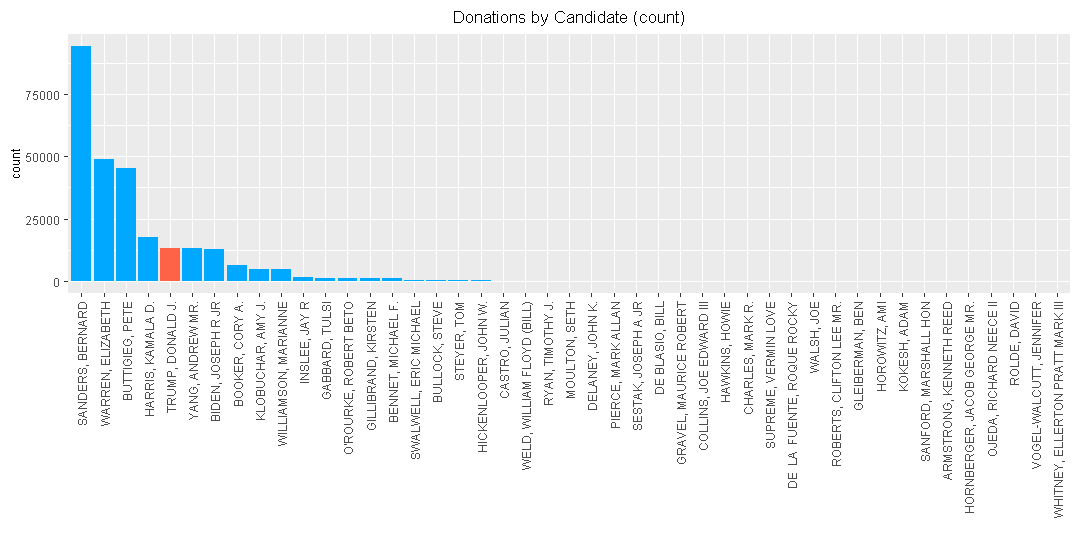

In [22]:
ggplot(data.cand) + ggtitle("Donations by Candidate (count)") + xlab("") +
geom_col(aes(x=sortby(CAND_NAME, count, decreasing=TRUE), y=count, fill=CAND_PTY_AFFILIATION)) +
scale_fill_manual(values=PARTY_COLOR) +
theme.x_axis_90 + theme.no_legend

In [23]:
fmt(data.cand[data.cand$count == max(data.cand$count),], "candidate with highest number of donations")

CAND_NAME,CAND_PTY_AFFILIATION,count,sum,mean
"SANDERS, BERNARD",DEM,94172,4593227,48.77487


In [24]:
fmt(data.party[order(data.party$count, decreasing=TRUE),], "donations by party (sorted by count)")

CAND_PTY_AFFILIATION,count,sum,mean
DEM,257268,40834113,158.72208
REP,13510,1315760,97.39156
LIB,18,5722,317.88889
GRE,11,1960,178.18182
IND,9,7970,885.55556
OTH,7,855,122.14286


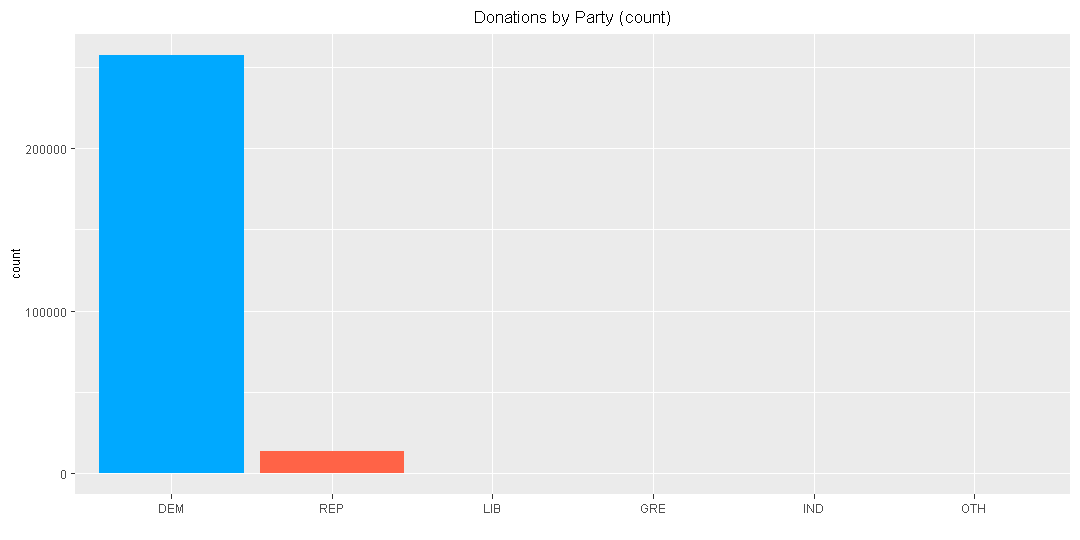

In [25]:
ggplot(data.party) + ggtitle("Donations by Party (count)") + xlab("") +
geom_col(aes(x=sortby(CAND_PTY_AFFILIATION, count, decreasing=TRUE), y=count, fill=CAND_PTY_AFFILIATION)) +
scale_fill_manual(values=PARTY_COLOR) +
theme.no_legend

#### \\$ Donated  

In [26]:
fmt(data.cand[order(data.cand$sum, decreasing=TRUE),], "donations by candidate (sorted by sum)")

CAND_NAME,CAND_PTY_AFFILIATION,count,sum,mean
"BUTTIGIEG, PETE",DEM,45252,9223713,203.82995
"HARRIS, KAMALA D.",DEM,17552,7478362,426.06894
"BIDEN, JOSEPH R JR",DEM,12979,4836782,372.66215
"SANDERS, BERNARD",DEM,94172,4593227,48.77487
"WARREN, ELIZABETH",DEM,48699,4219663,86.64784
"BOOKER, CORY A.",DEM,6322,2540229,401.80781
"YANG, ANDREW MR.",DEM,13126,1474597,112.34169
"TRUMP, DONALD J.",REP,13255,1205931,90.97933
"KLOBUCHAR, AMY J.",DEM,4931,1117414,226.61002
"GILLIBRAND, KIRSTEN",DEM,1196,752071,628.82191


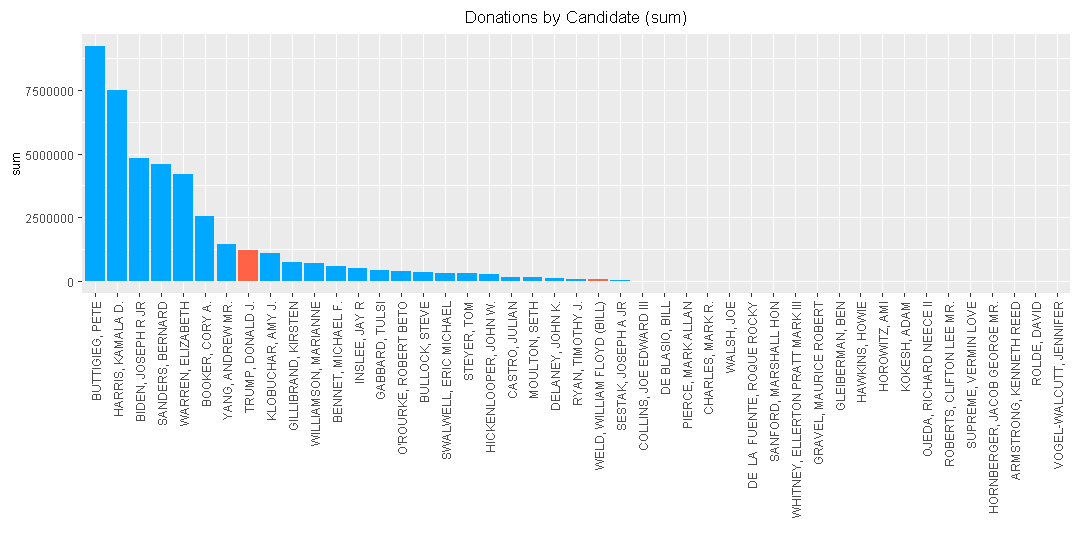

In [27]:
ggplot(data.cand) + ggtitle("Donations by Candidate (sum)") + xlab("") +
geom_col(aes(x=sortby(CAND_NAME, sum, decreasing=TRUE), y=sum, fill=CAND_PTY_AFFILIATION)) +
scale_fill_manual(values=PARTY_COLOR) +
theme.x_axis_90 + theme.no_legend

In [28]:
fmt(data.cand[data.cand$sum == max(data.cand$sum),], "candidate with highest $ donated")

CAND_NAME,CAND_PTY_AFFILIATION,count,sum,mean
"BUTTIGIEG, PETE",DEM,45252,9223713,203.83


In [29]:
fmt(data.party[order(data.party$sum, decreasing=TRUE),], "donations by party (sorted by sum)")

CAND_PTY_AFFILIATION,count,sum,mean
DEM,257268,40834113,158.72208
REP,13510,1315760,97.39156
IND,9,7970,885.55556
LIB,18,5722,317.88889
GRE,11,1960,178.18182
OTH,7,855,122.14286


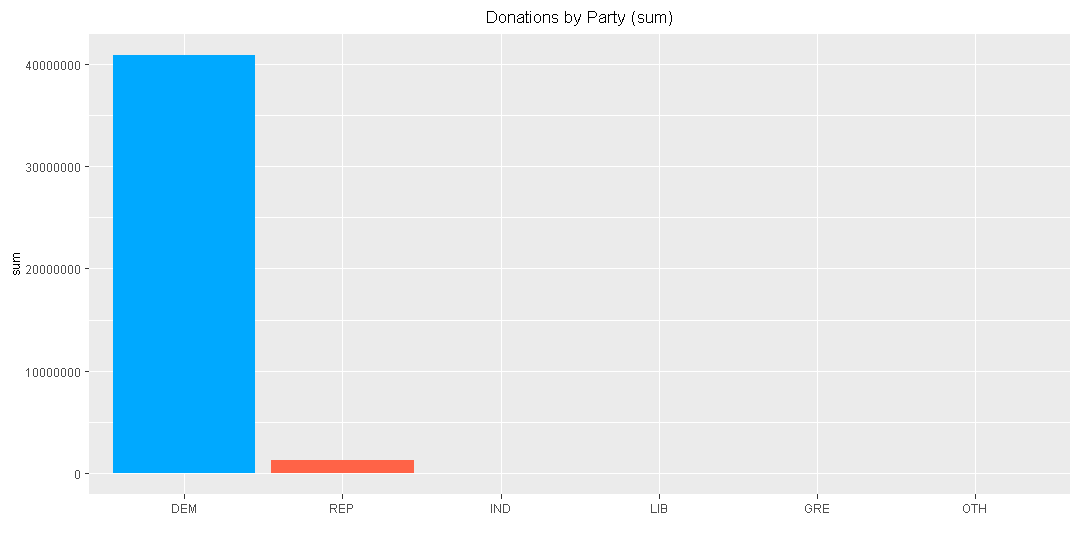

In [30]:
ggplot(data.party) + ggtitle("Donations by Party (sum)") + xlab("") +
geom_col(aes(x=sortby(CAND_PTY_AFFILIATION, sum, decreasing=TRUE), y=sum, fill=CAND_PTY_AFFILIATION)) +
scale_fill_manual(values=PARTY_COLOR) +
theme.no_legend

#### Average \\$ Donated  

In [31]:
fmt(data.cand[order(data.cand$mean, decreasing=TRUE),], "donations by candidate (sorted by mean)")

CAND_NAME,CAND_PTY_AFFILIATION,count,sum,mean
"WHITNEY, ELLERTON PRATT MARK III",LIB,1,2800,2800.00000
"COLLINS, JOE EDWARD III",REP,10,25000,2500.00000
"DE BLASIO, BILL",DEM,15,22950,1530.00000
"CHARLES, MARK R.",IND,9,7970,885.55556
"HICKENLOOPER, JOHN W.",DEM,385,297517,772.77143
"MOULTON, SETH",DEM,216,165724,767.24074
"WALSH, JOE",REP,8,6050,756.25000
"CASTRO, JULIAN",DEM,228,167837,736.12719
"SANFORD, MARSHALL HON",REP,4,2900,725.00000
"BULLOCK, STEVE",DEM,507,366892,723.65286


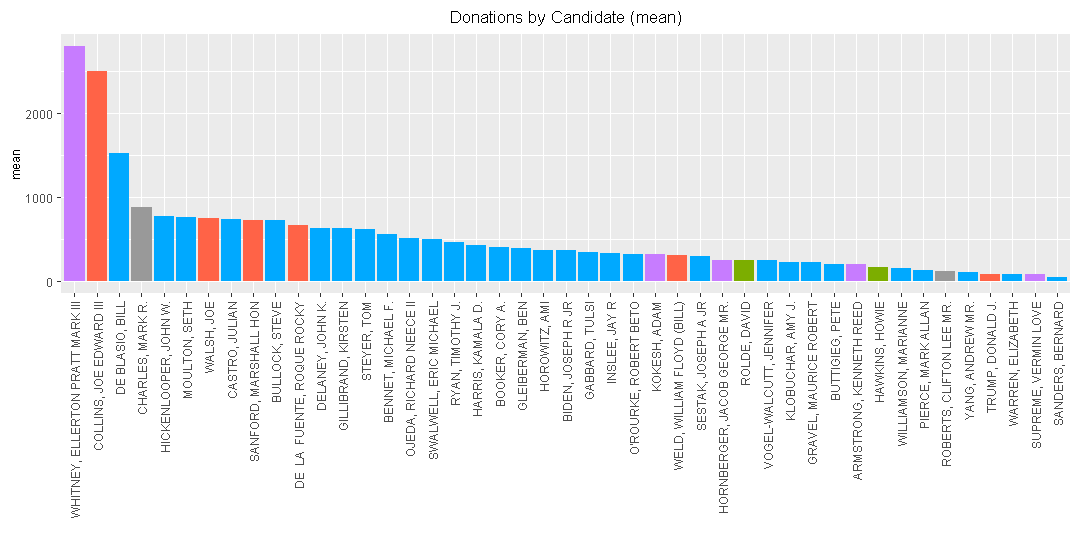

In [32]:
ggplot(data.cand) + ggtitle("Donations by Candidate (mean)") + xlab("") +
geom_col(aes(x=sortby(CAND_NAME, mean, decreasing=TRUE), y=mean, fill=CAND_PTY_AFFILIATION)) +
scale_fill_manual(values=PARTY_COLOR) +
theme.x_axis_90 + theme.no_legend

In [33]:
fmt(data.cand[data.cand$mean == max(data.cand$mean),], "candidate with highest average $ donated")

CAND_NAME,CAND_PTY_AFFILIATION,count,sum,mean
"WHITNEY, ELLERTON PRATT MARK III",LIB,1,2800,2800


In [34]:
fmt(data.party[order(data.party$mean, decreasing=TRUE),], "donations by party (sorted by mean)")

CAND_PTY_AFFILIATION,count,sum,mean
IND,9,7970,885.55556
LIB,18,5722,317.88889
GRE,11,1960,178.18182
DEM,257268,40834113,158.72208
OTH,7,855,122.14286
REP,13510,1315760,97.39156


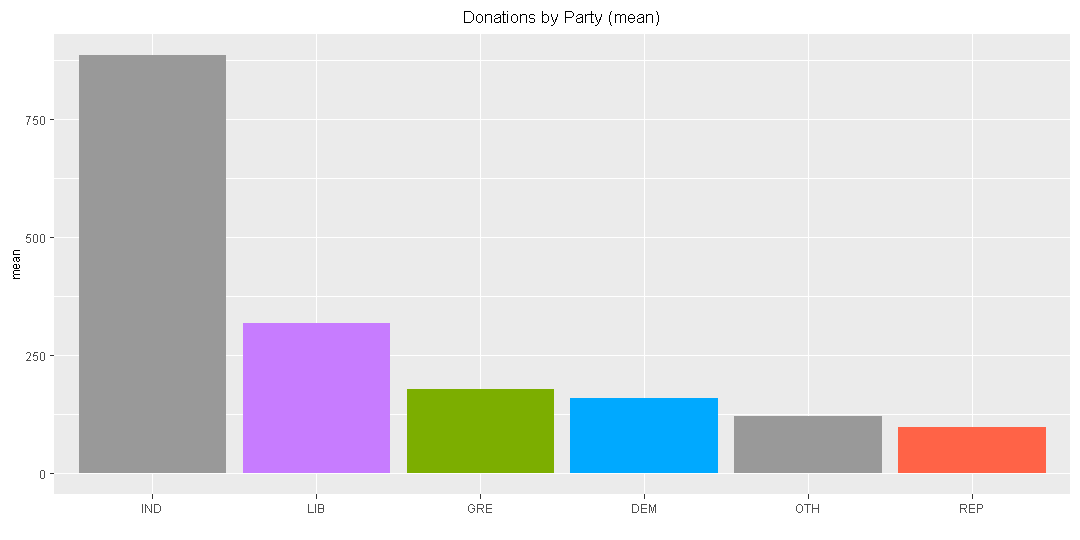

In [35]:
ggplot(data.party) + ggtitle("Donations by Party (mean)") + xlab("") +
geom_col(aes(x=sortby(CAND_PTY_AFFILIATION, mean, decreasing=TRUE), y=mean, fill=CAND_PTY_AFFILIATION)) +
scale_fill_manual(values=PARTY_COLOR) +
theme.no_legend

#### Average \\$ donated - adjusted for high mean candidates

In [36]:
data.cand.xhm = data.cand[data.cand$mean < 2800,]
fmt(data.cand.xhm, "excluding high mean candidates")

CAND_NAME,CAND_PTY_AFFILIATION,count,sum,mean
"ARMSTRONG, KENNETH REED",LIB,2,404,202.00000
"BENNET, MICHAEL F.",DEM,1097,612003,557.88788
"BIDEN, JOSEPH R JR",DEM,12979,4836782,372.66215
"BOOKER, CORY A.",DEM,6322,2540229,401.80781
"BULLOCK, STEVE",DEM,507,366892,723.65286
"BUTTIGIEG, PETE",DEM,45252,9223713,203.82995
"CASTRO, JULIAN",DEM,228,167837,736.12719
"CHARLES, MARK R.",IND,9,7970,885.55556
"COLLINS, JOE EDWARD III",REP,10,25000,2500.00000
"DE LA FUENTE, ROQUE ROCKY",REP,8,5300,662.50000


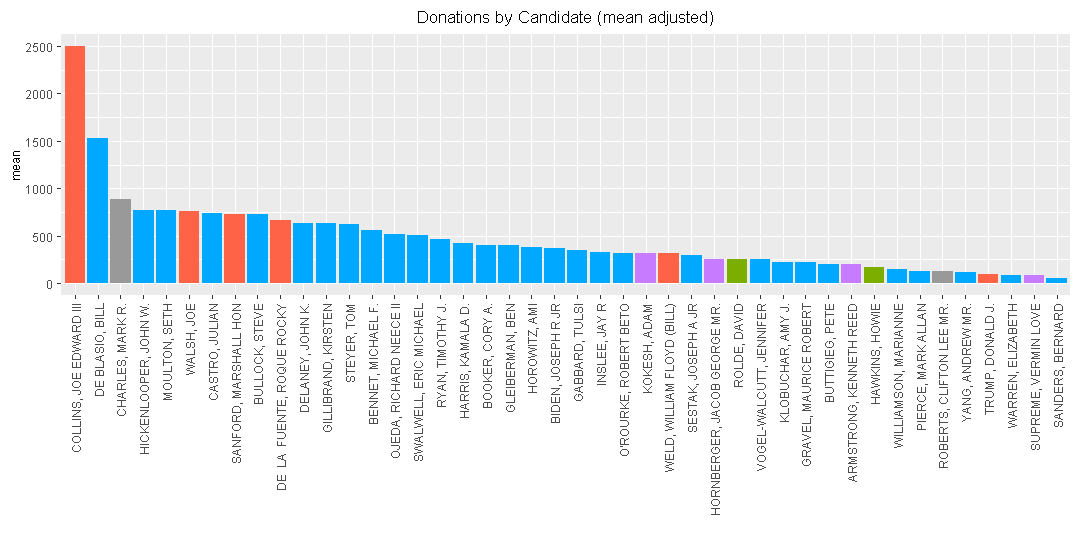

In [37]:
ggplot(data.cand.xhm) + ggtitle("Donations by Candidate (mean adjusted)") + xlab("") +
geom_col(aes(x=sortby(CAND_NAME, mean, decreasing=TRUE), y=mean, fill=CAND_PTY_AFFILIATION)) +
scale_fill_manual(values=PARTY_COLOR) +
theme.x_axis_90 + theme.no_legend

In [38]:
data.adjust = data[data$CAND_NAME %in% data.cand.xhm$CAND_NAME,]

data.party.xhm = aggregate(TRANSACTION_AMT ~ CAND_PTY_AFFILIATION, data.adjust, mean)
names(data.party.xhm)[2] = "mean"

data.party.xhm

CAND_PTY_AFFILIATION,mean
DEM,158.72208
GRE,178.18182
IND,885.55556
LIB,171.88235
OTH,122.14286
REP,97.39156


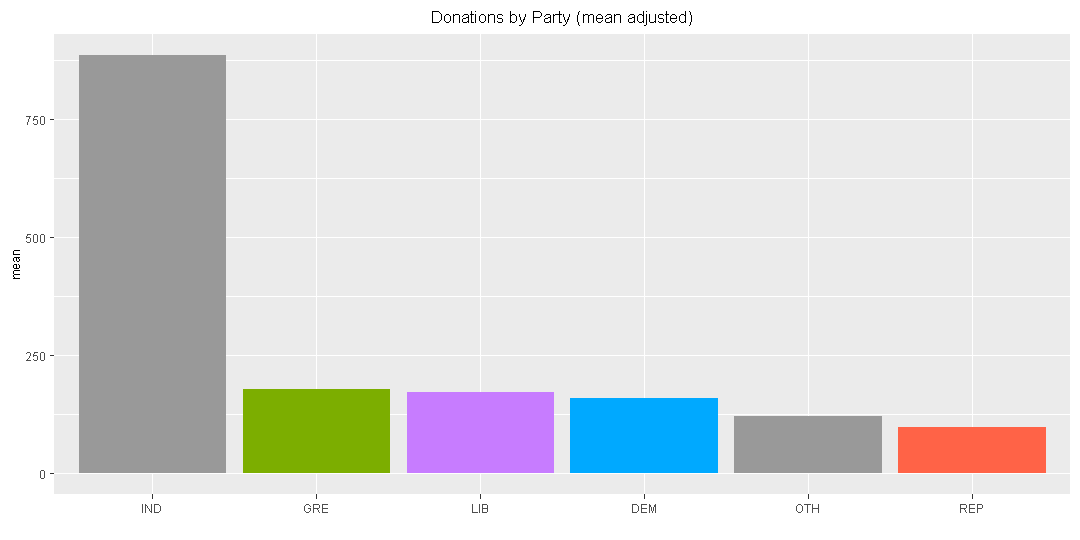

In [39]:
ggplot(data.party.xhm) + ggtitle("Donations by Party (mean adjusted)") + xlab("") +
geom_col(aes(x=sortby(CAND_PTY_AFFILIATION, mean, decreasing=TRUE), y=mean, fill=CAND_PTY_AFFILIATION)) +
scale_fill_manual(values=PARTY_COLOR) +
theme.no_legend

#### Average \\$ donated - adjusted for low count candidates

In [40]:
data.cand.xlc = data.cand[data.cand$count >= 100,]
fmt(data.cand.xlc, "excluding low count candidates")

CAND_NAME,CAND_PTY_AFFILIATION,count,sum,mean
"BENNET, MICHAEL F.",DEM,1097,612003,557.88788
"BIDEN, JOSEPH R JR",DEM,12979,4836782,372.66215
"BOOKER, CORY A.",DEM,6322,2540229,401.80781
"BULLOCK, STEVE",DEM,507,366892,723.65286
"BUTTIGIEG, PETE",DEM,45252,9223713,203.82995
"CASTRO, JULIAN",DEM,228,167837,736.12719
"DELANEY, JOHN K.",DEM,167,105163,629.71856
"GABBARD, TULSI",DEM,1245,429401,344.90040
"GILLIBRAND, KIRSTEN",DEM,1196,752071,628.82191
"HARRIS, KAMALA D.",DEM,17552,7478362,426.06894


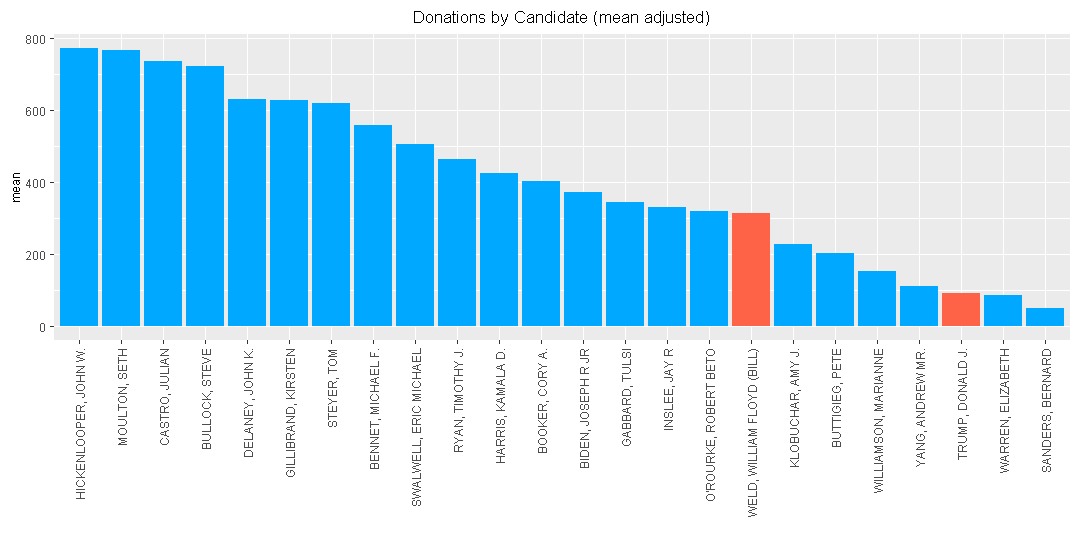

In [41]:
ggplot(data.cand.xlc) + ggtitle("Donations by Candidate (mean adjusted)") + xlab("") +
geom_col(aes(x=sortby(CAND_NAME, mean, decreasing=TRUE), y=mean, fill=CAND_PTY_AFFILIATION)) +
scale_fill_manual(values=PARTY_COLOR) +
theme.x_axis_90 + theme.no_legend

In [42]:
data.adjust = data[data$CAND_NAME %in% data.cand.xlc$CAND_NAME,]

data.party.xlc = aggregate(TRANSACTION_AMT ~ CAND_PTY_AFFILIATION, data.adjust, mean)
names(data.party.xlc)[2] = "mean"

data.party.xlc

CAND_PTY_AFFILIATION,mean
DEM,158.58749
REP,94.69659


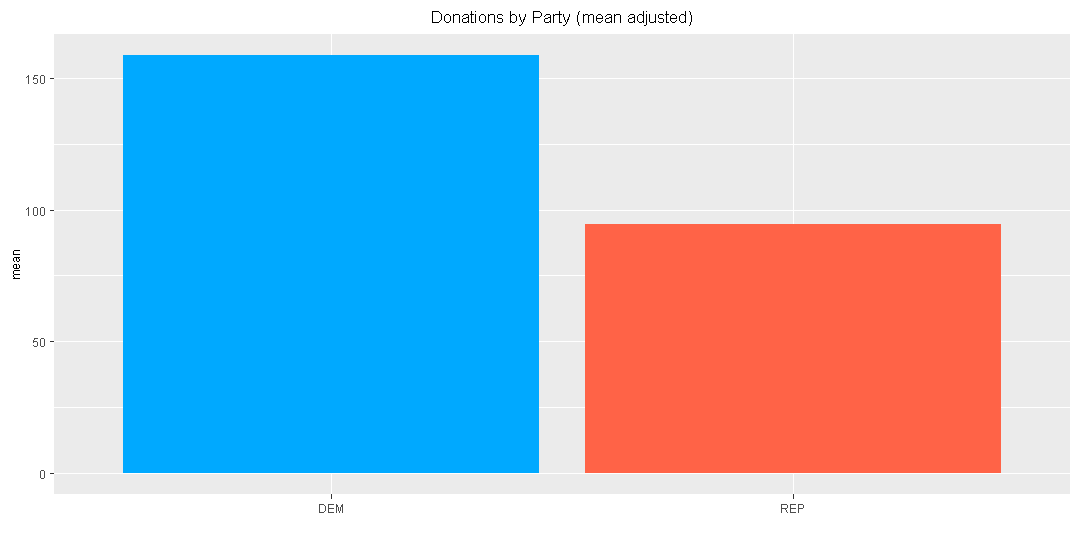

In [43]:
ggplot(data.party.xlc) + ggtitle("Donations by Party (mean adjusted)") + xlab("") +
geom_col(aes(x=sortby(CAND_PTY_AFFILIATION, mean, decreasing=TRUE), y=mean, fill=CAND_PTY_AFFILIATION)) +
scale_fill_manual(values=PARTY_COLOR) +
theme.no_legend

#### # donations, \\$ donated, average \\$ donated

variable,aspect
candidate,horizontal position
$ donated,vertical position
# donations,size
average $ donated,color intensity


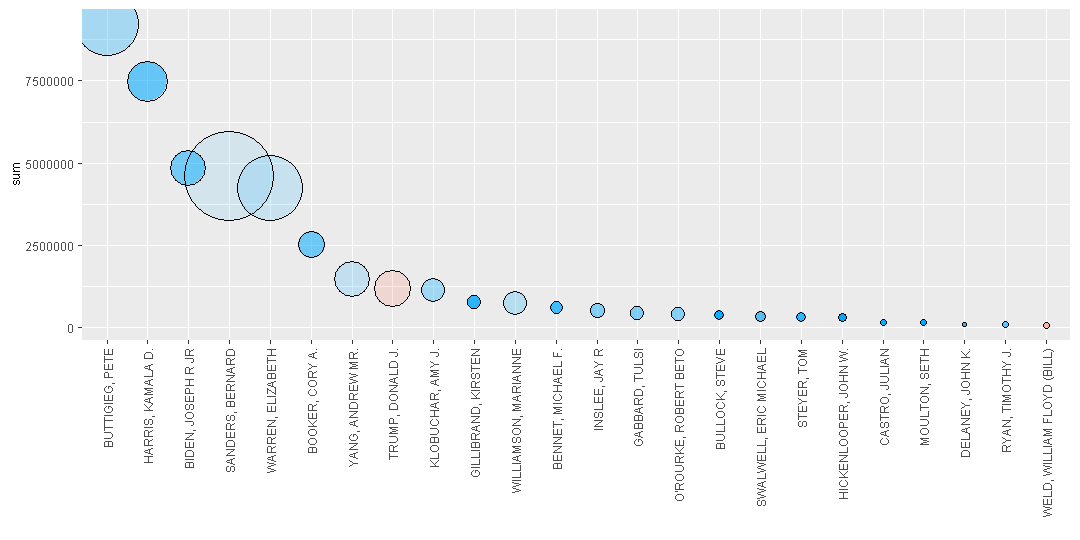

In [44]:
data.frame(variable=c("candidate","$ donated","# donations","average $ donated"),
           aspect=c("horizontal position","vertical position","size","color intensity"))

ggplot(data.cand.xlc) + xlab("") +
geom_point(aes(x=sortby(CAND_NAME, sum, decreasing=TRUE), y=sum, size=count, alpha=mean, color=CAND_PTY_AFFILIATION)) +
geom_point(aes(x=sortby(CAND_NAME, sum, decreasing=TRUE), y=sum, size=count), color="black", pch=1) +
scale_size_continuous(range=c(1,25)) +
theme.x_axis_90 + theme.no_legend

In [45]:
data.3d = data.cand.xlc[rank(data.cand.xlc$sum) > nrow(data.cand.xlc)-10, c("count","sum","mean","CAND_NAME","CAND_PTY_AFFILIATION")]
# text3d supports maximum of 21 text items, here plot 10 text items

p = open3d(); view3d(-20, -4, zoom=0.65)
plot3d(data.3d, type="s", col=PARTY_COLOR[as.character(data.3d$CAND_PTY_AFFILIATION)], alpha=0.2)
text3d(x=data.3d, text=data.3d$CAND_NAME)
grid3d(c("x","y","z"))
rglwidget(elementId="myplot", width=500, height=500, reuse=FALSE)

HTML widgets cannot be represented in plain text (need html)

### Perspective: By Occupation

In [46]:
candidate = data.cand[order(data.cand$sum, decreasing=TRUE)[1],"CAND_NAME"] # 1st highest $ donated
df = as.data.frame(table(data[data$CAND_NAME == candidate, "OCCUPATION"]))
fmt(df[order(df$Freq, decreasing=TRUE),][1:10,], candidate)

Var1,Freq
NOT EMPLOYED,14895
ATTORNEY,1403
RETIRED,1011
TEACHER,766
PHYSICIAN,743
CONSULTANT,629
ENGINEER,602
WRITER,583
,533
CEO,447


In [47]:
candidate = data.cand[order(data.cand$sum, decreasing=TRUE)[2],"CAND_NAME"] # 2nd highest $ donated
df = as.data.frame(table(data[data$CAND_NAME == candidate, "OCCUPATION"]))
fmt(df[order(df$Freq, decreasing=TRUE),][1:10,], candidate)

Var1,Freq
NOT EMPLOYED,3460
RETIRED,2562
ATTORNEY,1183
PHYSICIAN,335
CONSULTANT,271
SOFTWARE ENGINEER,230
TEACHER,225
EXECUTIVE,218
WRITER,217
CEO,215


In [48]:
candidate = data.cand[order(data.cand$sum, decreasing=TRUE)[3],"CAND_NAME"] # 3rd highest $ donated
df = as.data.frame(table(data[data$CAND_NAME == candidate, "OCCUPATION"]))
fmt(df[order(df$Freq, decreasing=TRUE),][1:10,], candidate)

Var1,Freq
NOT EMPLOYED,4934
ATTORNEY,729
RETIRED,516
,309
CONSULTANT,233
PHYSICIAN,230
CEO,224
LAWYER,211
EXECUTIVE,199
TEACHER,179


In [49]:
candidate = data.cand[order(data.cand$sum, decreasing=TRUE)[4],"CAND_NAME"] # 4th highest $ donated
df = as.data.frame(table(data[data$CAND_NAME == candidate, "OCCUPATION"]))
fmt(df[order(df$Freq, decreasing=TRUE),][1:10,], candidate)

Var1,Freq
NOT EMPLOYED,23112
NONE,2885
TEACHER,2879
SOFTWARE ENGINEER,2511
ENGINEER,1973
SALES,1123
RETIRED,1016
,940
ATTORNEY,887
PHYSICIAN,820


In [50]:
df = as.data.frame(table(data[data$CAND_NAME == "TRUMP, DONALD J.", "OCCUPATION"])) # incumbent
fmt(df[order(df$Freq, decreasing=TRUE), ][1:10,], "TRUMP, DONALD J.")

Var1,Freq
RETIRED,5539
NOT EMPLOYED,723
PHYSICIAN,191
ENTREPRENEUR,187
SALES,178
OWNER,175
ENGINEER,161
REALTOR,126
MANAGER,109
TEACHER,109


### Perspective: CEO

In [51]:
data.ceo = aggregate(TRANSACTION_AMT ~ CAND_NAME+CAND_PTY_AFFILIATION, data[data$OCCUPATION == "CEO",], length)
names(data.ceo)[3] = "count"

fmt(data.ceo[order(data.ceo$count, decreasing=TRUE),], "CEO")

CAND_NAME,CAND_PTY_AFFILIATION,count
"BUTTIGIEG, PETE",DEM,447
"SANDERS, BERNARD",DEM,409
"BIDEN, JOSEPH R JR",DEM,224
"HARRIS, KAMALA D.",DEM,215
"YANG, ANDREW MR.",DEM,156
"WARREN, ELIZABETH",DEM,141
"BOOKER, CORY A.",DEM,123
"TRUMP, DONALD J.",REP,107
"BENNET, MICHAEL F.",DEM,43
"GABBARD, TULSI",DEM,33


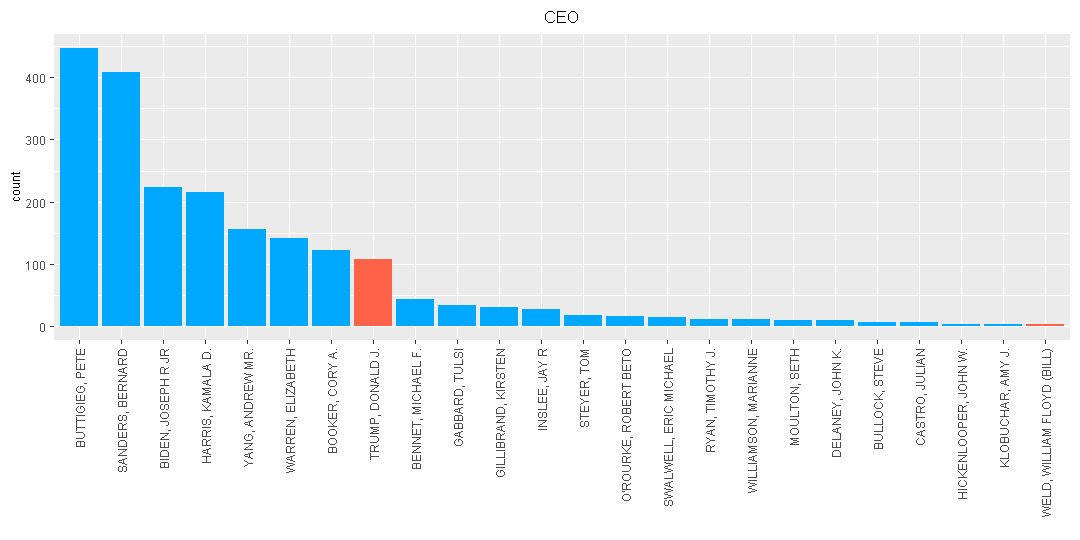

In [52]:
ggplot(data.ceo) + ggtitle("CEO") + xlab("") +
geom_col(aes(x=sortby(CAND_NAME, count, decreasing=TRUE), y=count, fill=CAND_PTY_AFFILIATION)) +
scale_fill_manual(values=PARTY_COLOR) +
theme.x_axis_90 + theme.no_legend

### Perspective: By Candidate & Tier

In [53]:
data.long = melt(data, id.vars=c("CAND_NAME","tier"), measure.vars="TRANSACTION_AMT")
data.cross = dcast(data.long, tier ~ CAND_NAME, sum)

fmt(data.cross, "$ donated by candidate & tier:", position="left")

tier,"ARMSTRONG, KENNETH REED","BENNET, MICHAEL F.","BIDEN, JOSEPH R JR","BOOKER, CORY A.","BULLOCK, STEVE","BUTTIGIEG, PETE","CASTRO, JULIAN","CHARLES, MARK R.","COLLINS, JOE EDWARD III","DE LA FUENTE, ROQUE ROCKY","DE BLASIO, BILL","DELANEY, JOHN K.","GABBARD, TULSI","GILLIBRAND, KIRSTEN","GLEIBERMAN, BEN","GRAVEL, MAURICE ROBERT","HARRIS, KAMALA D.","HAWKINS, HOWIE","HICKENLOOPER, JOHN W.","HORNBERGER, JACOB GEORGE MR.","HOROWITZ, AMI","INSLEE, JAY R","KLOBUCHAR, AMY J.","KOKESH, ADAM","MOULTON, SETH","O'ROURKE, ROBERT BETO","OJEDA, RICHARD NEECE II","PIERCE, MARK ALLAN","ROBERTS, CLIFTON LEE MR.","ROLDE, DAVID","RYAN, TIMOTHY J.","SANDERS, BERNARD","SANFORD, MARSHALL HON","SESTAK, JOSEPH A JR","STEYER, TOM","SUPREME, VERMIN LOVE","SWALWELL, ERIC MICHAEL","TRUMP, DONALD J.","VOGEL-WALCUTT, JENNIFER","WALSH, JOE","WARREN, ELIZABETH","WELD, WILLIAM FLOYD (BILL)","WHITNEY, ELLERTON PRATT MARK III","WILLIAMSON, MARIANNE","YANG, ANDREW MR."
high,0,487777,3848639,1866404,294788,6157460,137075,6600,25000,3800,22200,85937,323977,587289,0,1000,5840446,0,267696,0,1000,325520,700112,0,170200,216582,1000,3627,0,0,72880,753737,2000,15795,254553,0,225241,389632,0,3800,1067886,37200,2800,355492,542645
mid,404,119084,899453,656257,69323,3010720,29014,1350,0,1500,750,17633,87423,156254,2400,1640,1403761,1679,50390,500,500,178291,340474,1200,33705,164042,0,5890,836,250,26010,2073767,900,9160,56974,208,95304,662520,250,2250,2190610,29900,0,288530,646220
low,0,11341,190990,76550,2781,594324,1748,20,0,0,0,1593,18001,8528,0,59,234155,31,2906,0,3,17521,77328,80,739,16117,25,2071,19,0,2631,1765723,0,1511,2315,530,4417,269990,0,0,963967,3479,0,82217,285732
other,0,-6199,-102300,-58982,0,-538791,0,0,0,0,0,0,0,0,0,0,0,0,-23475,0,0,0,-500,0,-38920,0,0,0,0,0,0,0,0,0,0,0,0,-116211,0,0,-2800,0,0,0,0


In [54]:
data.cross.long = melt(data.cross, id.vars="tier")
# data.cross.long[1:10,]

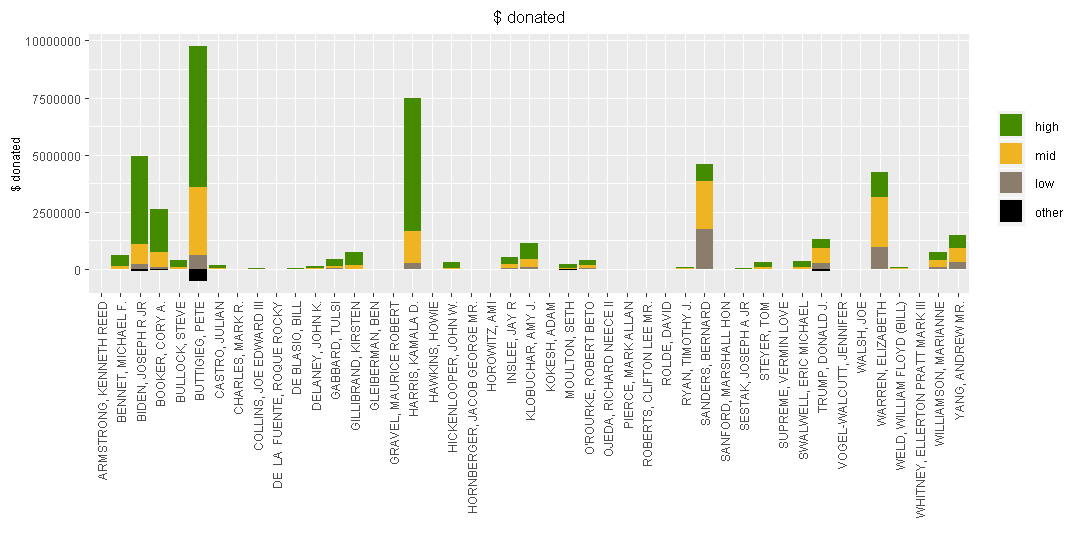

In [55]:
ggplot(data.cross.long) + ggtitle("$ donated") + xlab("") + ylab("$ donated") +
geom_col(aes(x=variable, y=value, fill=tier)) +
scale_fill_manual(values=c(PALETTE[c(6,5,8)], "black")) +
theme.x_axis_90

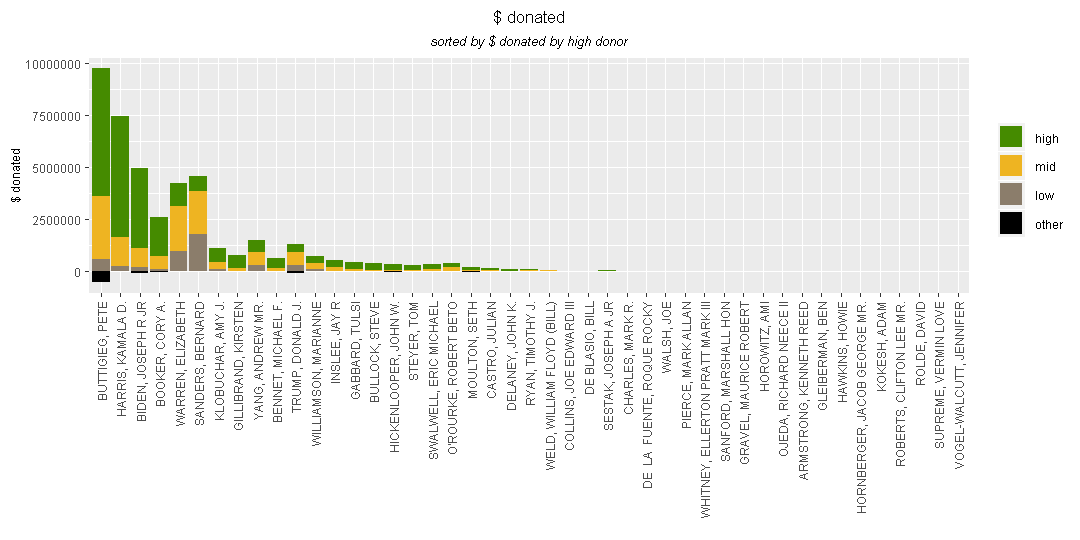

In [56]:
data.cross.long.tier = data.cross.long[data.cross.long$tier=="high",]
data.cross.long.tier$ranking = rank(data.cross.long.tier$value)
data.cross.long.rank = merge(data.cross.long, data.cross.long.tier[,c("variable", "ranking")])

ggplot(data.cross.long.rank) + ggtitle("$ donated","sorted by $ donated by high donor") +
xlab("") + ylab("$ donated") +
geom_col(aes(x=sortby(variable, ranking, decreasing=TRUE), y=value, fill=tier)) +
scale_fill_manual(values=c(PALETTE[c(6,5,8)], "black")) +
theme.x_axis_90

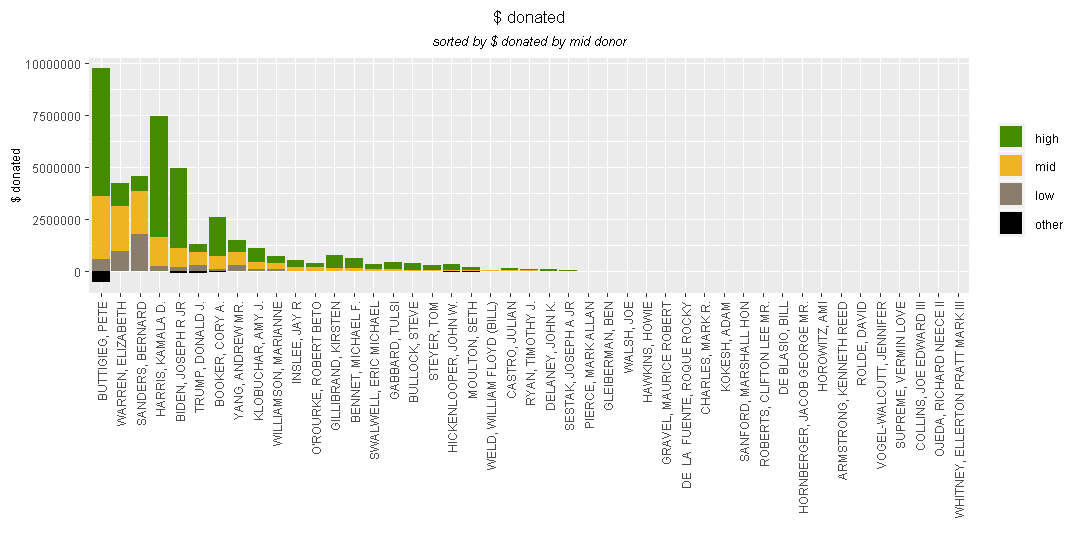

In [57]:
data.cross.long.tier = data.cross.long[data.cross.long$tier=="mid",]
data.cross.long.tier$ranking = rank(data.cross.long.tier$value)
data.cross.long.rank = merge(data.cross.long, data.cross.long.tier[,c("variable", "ranking")])

ggplot(data.cross.long.rank) + ggtitle("$ donated","sorted by $ donated by mid donor") +
xlab("") + ylab("$ donated") +
geom_col(aes(x=sortby(variable, ranking, decreasing=TRUE), y=value, fill=tier)) +
scale_fill_manual(values=c(PALETTE[c(6,5,8)], "black")) +
theme.x_axis_90

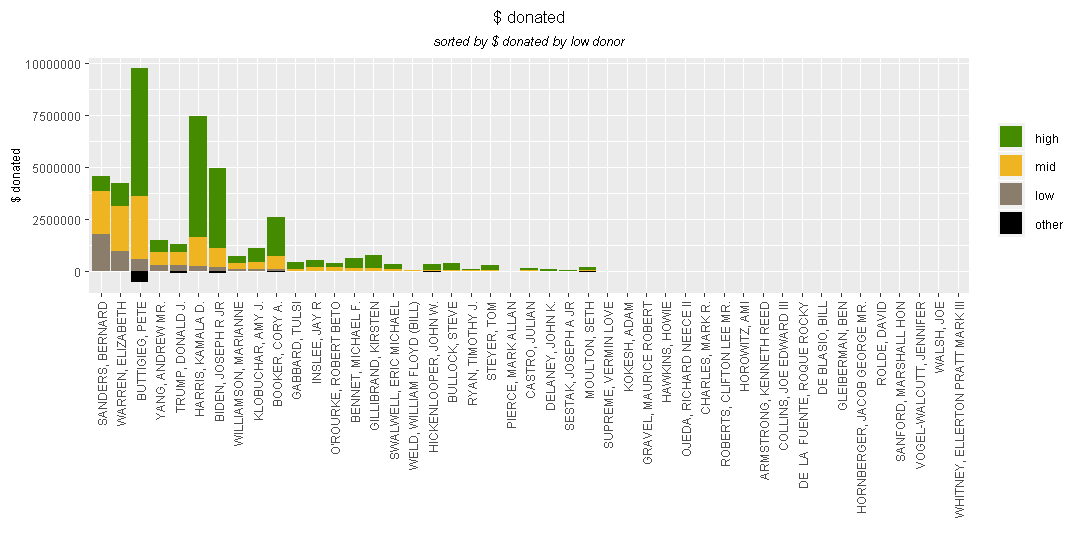

In [58]:
data.cross.long.tier = data.cross.long[data.cross.long$tier=="low",]
data.cross.long.tier$ranking = rank(data.cross.long.tier$value)
data.cross.long.rank = merge(data.cross.long, data.cross.long.tier[,c("variable", "ranking")])

ggplot(data.cross.long.rank) + ggtitle("$ donated","sorted by $ donated by low donor") +
xlab("") + ylab("$ donated") +
geom_col(aes(x=sortby(variable, ranking, decreasing=TRUE), y=value, fill=tier)) +
scale_fill_manual(values=c(PALETTE[c(6,5,8)], "black")) +
theme.x_axis_90

## Where Did They Donate?

### Perspective: By City

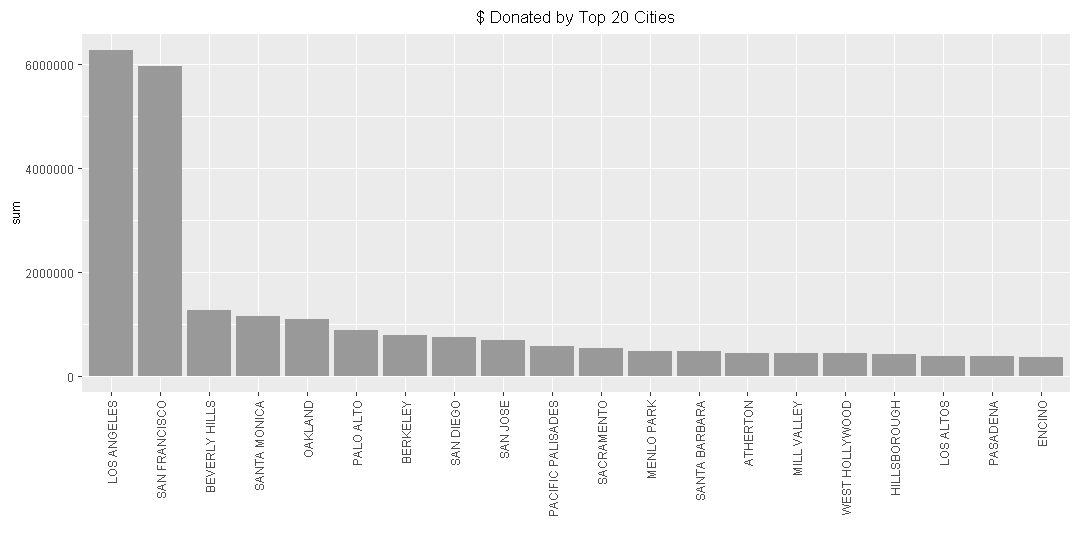

In [59]:
data.city = aggregate(TRANSACTION_AMT ~ CITY, data, sum)
names(data.city)[2] = "sum"

ggplot(data.city[order(data.city$sum, decreasing=TRUE),][1:20,]) +
ggtitle("$ Donated by Top 20 Cities") + xlab("") +
geom_col(aes(x=sortby(CITY, sum, decreasing=TRUE), y=sum), fill="gray60") +
theme.x_axis_90 + theme.no_legend

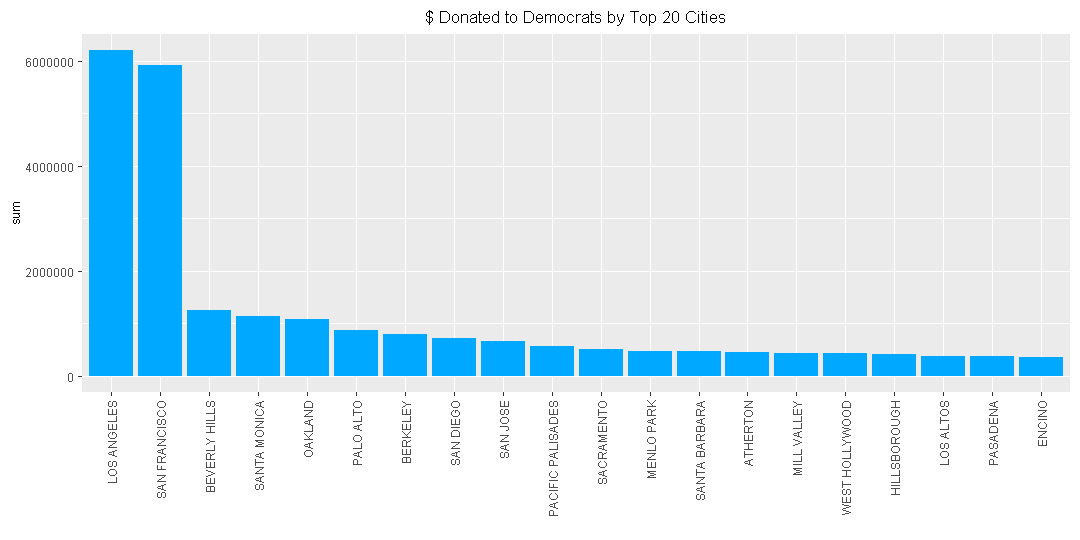

In [60]:
data.city.dem = aggregate(TRANSACTION_AMT ~ CITY, data[data$CAND_PTY_AFFILIATION == "DEM",], sum)
names(data.city.dem)[2] = "sum"

ggplot(data.city.dem[order(data.city.dem$sum, decreasing=TRUE),][1:20,]) +
ggtitle("$ Donated to Democrats by Top 20 Cities") + xlab("") +
geom_col(aes(x=sortby(CITY, sum, decreasing=TRUE), y=sum), fill=PARTY_COLOR["DEM"]) +
theme.x_axis_90 + theme.no_legend

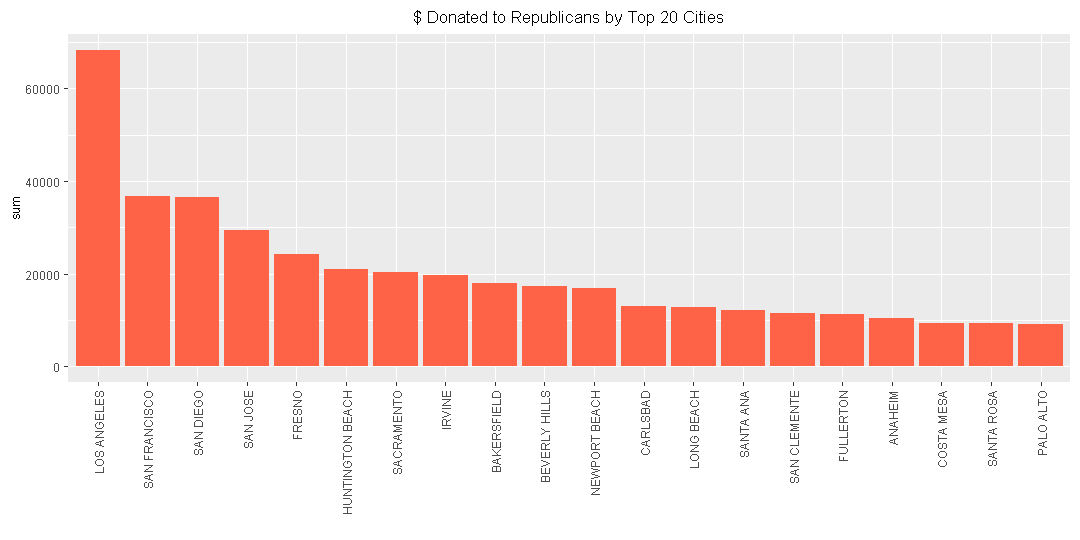

In [61]:
data.city.rep = aggregate(TRANSACTION_AMT ~ CITY, data[data$CAND_PTY_AFFILIATION == "REP",], sum)
names(data.city.rep)[2] = "sum"

ggplot(data.city.rep[order(data.city.rep$sum, decreasing=TRUE),][1:20,]) +
ggtitle("$ Donated to Republicans by Top 20 Cities") + xlab("") +
geom_col(aes(x=sortby(CITY, sum, decreasing=TRUE), y=sum), fill=PARTY_COLOR["REP"]) +
theme.x_axis_90 + theme.no_legend

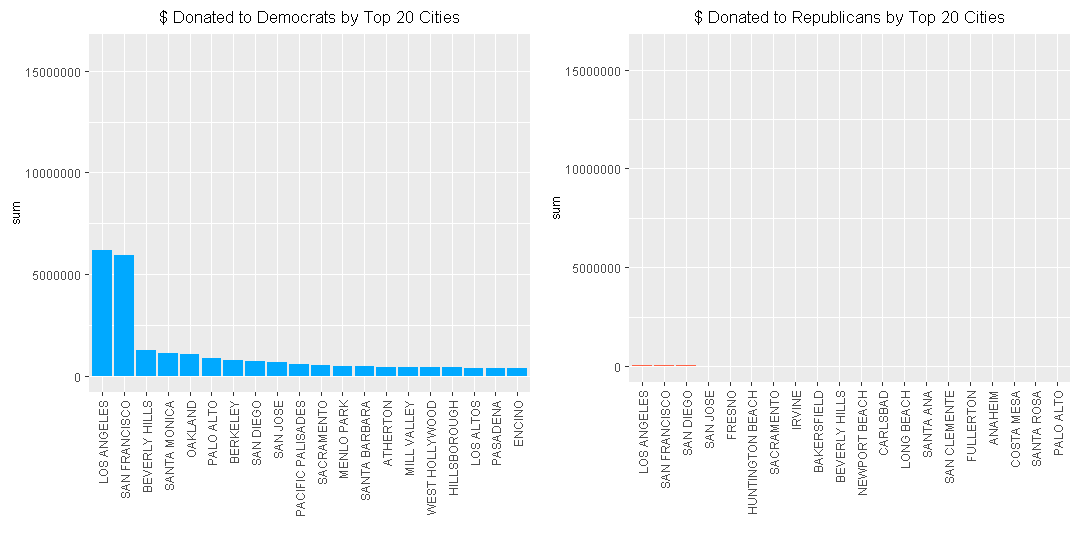

In [62]:
p1 = ggplot(data.city.dem[order(data.city.dem$sum, decreasing=TRUE),][1:20,]) +
     ggtitle("$ Donated to Democrats by Top 20 Cities") +
     ylim(0,16000000) + xlab("") +
     geom_col(aes(x=sortby(CITY, sum, decreasing=TRUE), y=sum), fill=PARTY_COLOR["DEM"]) +
     theme.x_axis_90 + theme.no_legend

p2 = ggplot(data.city.rep[order(data.city.rep$sum, decreasing=TRUE),][1:20,]) +
     ggtitle("$ Donated to Republicans by Top 20 Cities") +
     ylim(0,16000000) + xlab("") +
     geom_col(aes(x=sortby(CITY, sum, decreasing=TRUE), y=sum), fill=PARTY_COLOR["REP"]) +
     theme.x_axis_90 + theme.no_legend

grid.arrange(p1, p2, nrow=1)

### Perspective: Berkeley

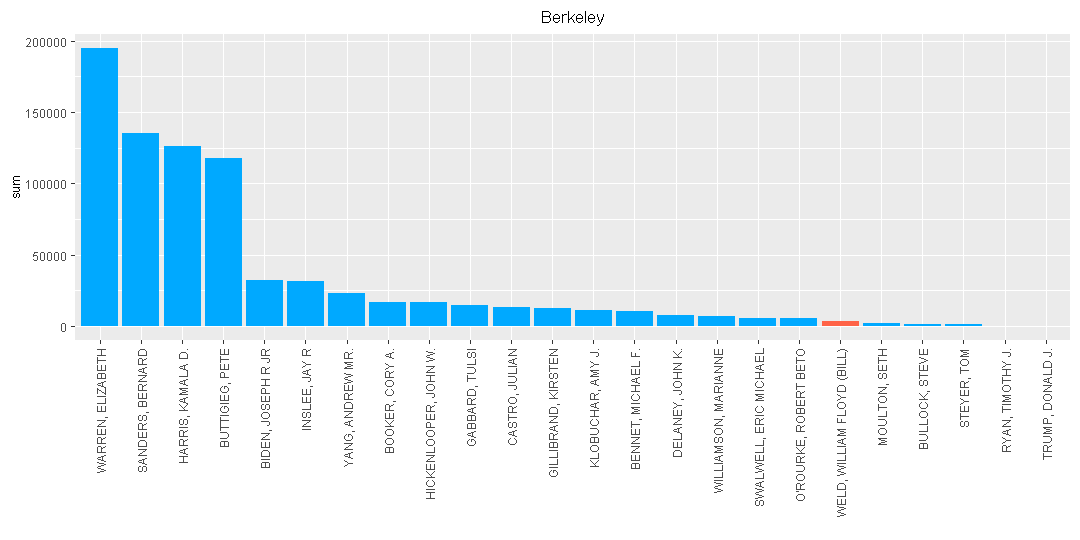

In [63]:
data.berkeley = aggregate(TRANSACTION_AMT ~ CAND_NAME+CAND_PTY_AFFILIATION, data[data$CITY == "BERKELEY",], sum)
names(data.berkeley)[3] = "sum"

ggplot(data.berkeley[order(data.berkeley$sum, decreasing=TRUE),]) + ggtitle("Berkeley") + xlab("") +
geom_col(aes(x=sortby(CAND_NAME, sum, decreasing=TRUE), y=sum, fill=CAND_PTY_AFFILIATION)) +
scale_fill_manual(values=PARTY_COLOR) +
theme.x_axis_90 + theme.no_legend

## When Did They Donate?

Time difference of 1.176222 mins


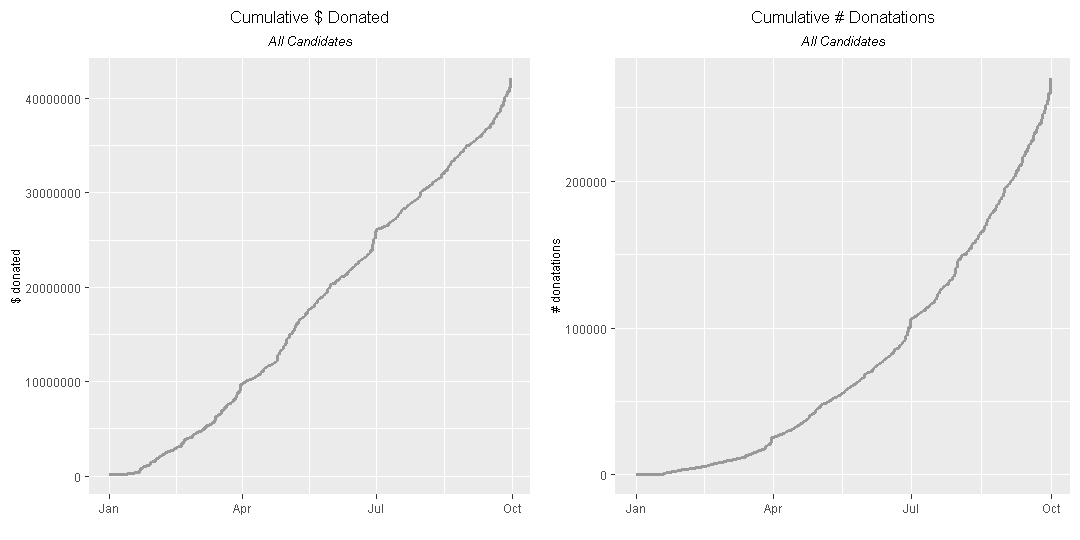

In [64]:
clock.start() # may take about 2 minutes

start_date = ymd("2019-01-01")
stop_date  = ymd("2019-09-30")

sum.pre = sum(data$TRANSACTION_AMT[data$TRANSACTION_DT < start_date])
count.pre = sum(data$count[data$TRANSACTION_DT < start_date])

data.since = data[data$TRANSACTION_DT >= start_date,]
data.since = data.since[order(data.since$TRANSACTION_DT),]
data.since$count = 1


p1 = ggplot(data.since) + xlim(start_date, stop_date) + 
     ggtitle("Cumulative $ Donated","All Candidates") + xlab("") + ylab("$ donated") +
     geom_step(aes(x=TRANSACTION_DT, y=sum.pre+cumsum(TRANSACTION_AMT)), size=1, color="gray60", na.rm=TRUE)

p2 = ggplot(data.since) + xlim(start_date, stop_date) + 
     ggtitle("Cumulative # Donatations","All Candidates") + xlab("") + ylab("# donatations") +
     geom_step(aes(x=TRANSACTION_DT, y=count.pre+cumsum(count)), size=1, color="gray60", na.rm=TRUE)

grid.arrange(p1, p2, nrow=1)

clock.stop()

Time difference of 10.78051 secs


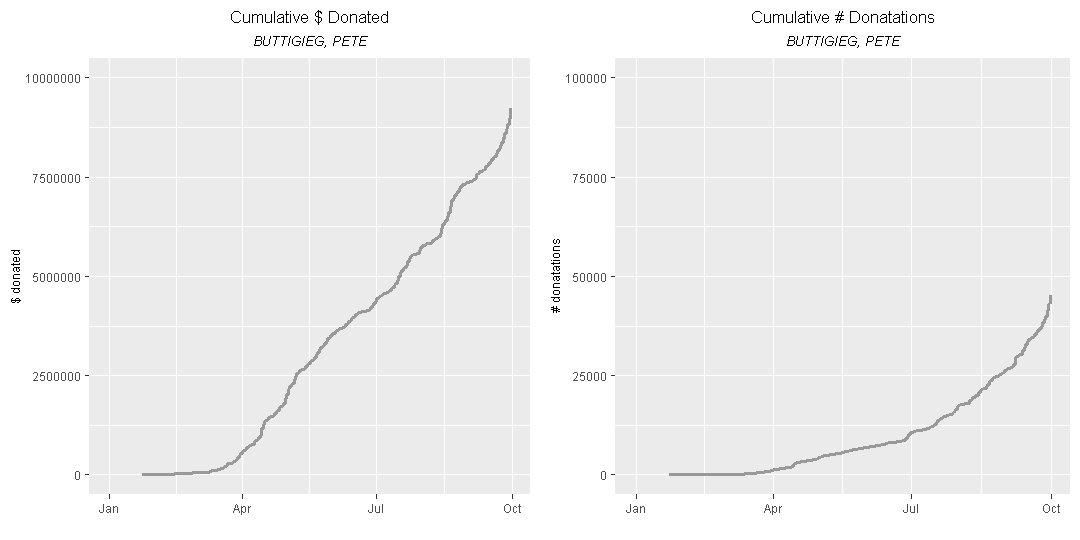

In [65]:
clock.start()

start_date = ymd("2019-01-01")
stop_date  = ymd("2019-09-30")

candidate = data.cand[order(data.cand$sum, decreasing=TRUE)[1],"CAND_NAME"] # 1st highest $ donated
data.who = data[data$CAND_NAME == candidate, ]

sum.pre = sum(data.who$TRANSACTION_AMT[data.who$TRANSACTION_DT < start_date])
count.pre = sum(data.who$count[data.who$TRANSACTION_DT < start_date])

data.who.since = data.who[data.who$TRANSACTION_DT >= start_date,]
data.who.since = data.who.since[order(data.who.since$TRANSACTION_DT),]
data.who.since$count = 1


p1 = ggplot(data.who.since) + xlim(start_date, stop_date) + 
     ggtitle("Cumulative $ Donated",candidate) + xlab("") + ylab("$ donated") + ylim(0,10000000) +
     geom_step(aes(x=TRANSACTION_DT, y=sum.pre+cumsum(TRANSACTION_AMT)), size=1, color="gray60")

p2 = ggplot(data.who.since) + xlim(start_date, stop_date) + 
     ggtitle("Cumulative # Donatations",candidate) + xlab("") + ylab("# donatations") + ylim(0,100000) +
     geom_step(aes(x=TRANSACTION_DT, y=count.pre+cumsum(count)), size=1, color="gray60")

grid.arrange(p1, p2, nrow=1)

clock.stop()

Time difference of 4.640299 secs


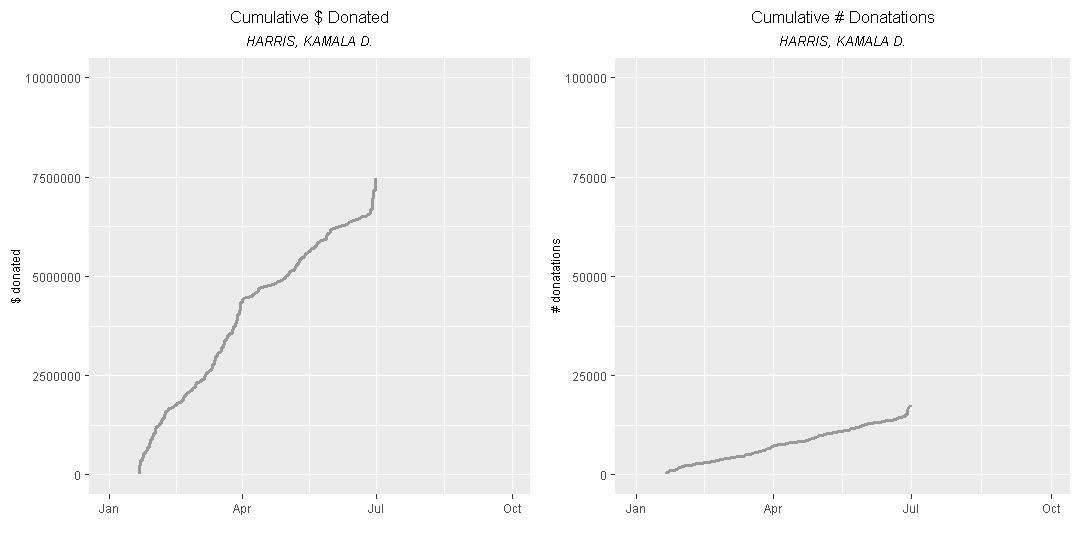

In [66]:
clock.start()

start_date = ymd("2019-01-01")
stop_date  = ymd("2019-09-30")

candidate = data.cand[order(data.cand$sum, decreasing=TRUE)[2],"CAND_NAME"] # 2nd highest $ donated
data.who = data[data$CAND_NAME == candidate, ]

sum.pre = sum(data.who$TRANSACTION_AMT[data.who$TRANSACTION_DT < start_date])
count.pre = sum(data.who$count[data.who$TRANSACTION_DT < start_date])

data.who.since = data.who[data.who$TRANSACTION_DT >= start_date,]
data.who.since = data.who.since[order(data.who.since$TRANSACTION_DT),]
data.who.since$count = 1


p1 = ggplot(data.who.since) + xlim(start_date, stop_date) + 
     ggtitle("Cumulative $ Donated",candidate) + xlab("") + ylab("$ donated") + ylim(0,10000000) +
     geom_step(aes(x=TRANSACTION_DT, y=sum.pre+cumsum(TRANSACTION_AMT)), size=1, color="gray60")

p2 = ggplot(data.who.since) + xlim(start_date, stop_date) + 
     ggtitle("Cumulative # Donatations",candidate) + xlab("") + ylab("# donatations") + ylim(0,100000) +
     geom_step(aes(x=TRANSACTION_DT, y=count.pre+cumsum(count)), size=1, color="gray60")

grid.arrange(p1, p2, nrow=1)

clock.stop()

Time difference of 3.906629 secs


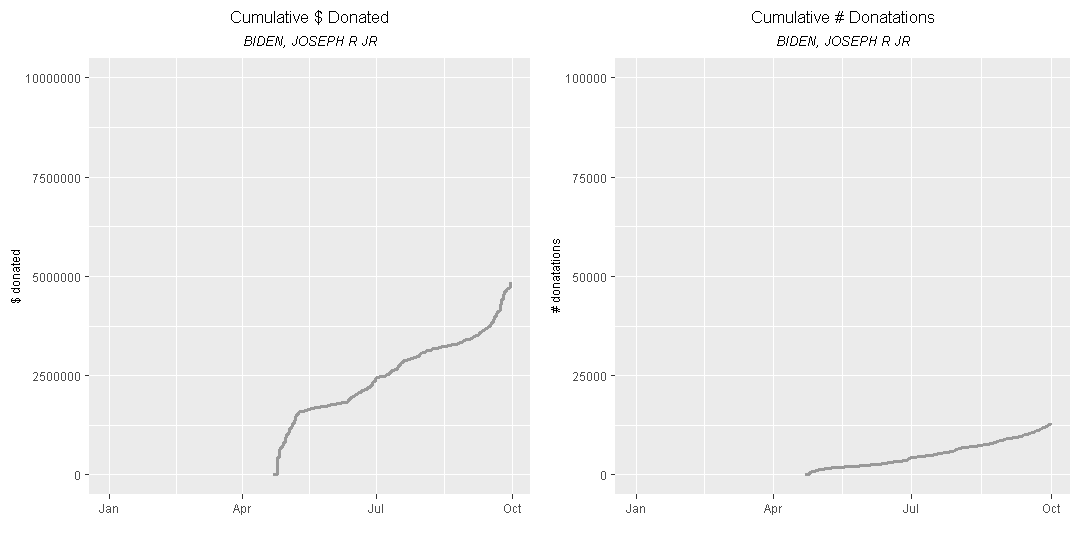

In [67]:
clock.start()

start_date = ymd("2019-01-01")
stop_date  = ymd("2019-09-30")

candidate = data.cand[order(data.cand$sum, decreasing=TRUE)[3],"CAND_NAME"] # 3rd highest $ donated
data.who = data[data$CAND_NAME == candidate, ]

sum.pre = sum(data.who$TRANSACTION_AMT[data.who$TRANSACTION_DT < start_date])
count.pre = sum(data.who$count[data.who$TRANSACTION_DT < start_date])

data.who.since = data.who[data.who$TRANSACTION_DT >= start_date,]
data.who.since = data.who.since[order(data.who.since$TRANSACTION_DT),]
data.who.since$count = 1


p1 = ggplot(data.who.since) + xlim(start_date, stop_date) + 
     ggtitle("Cumulative $ Donated",candidate) + xlab("") + ylab("$ donated") + ylim(0,10000000) +
     geom_step(aes(x=TRANSACTION_DT, y=sum.pre+cumsum(TRANSACTION_AMT)), size=1, color="gray60")

p2 = ggplot(data.who.since) + xlim(start_date, stop_date) + 
     ggtitle("Cumulative # Donatations",candidate) + xlab("") + ylab("# donatations") + ylim(0,100000) +
     geom_step(aes(x=TRANSACTION_DT, y=count.pre+cumsum(count)), size=1, color="gray60")

grid.arrange(p1, p2, nrow=1)

clock.stop()

Time difference of 30.54629 secs


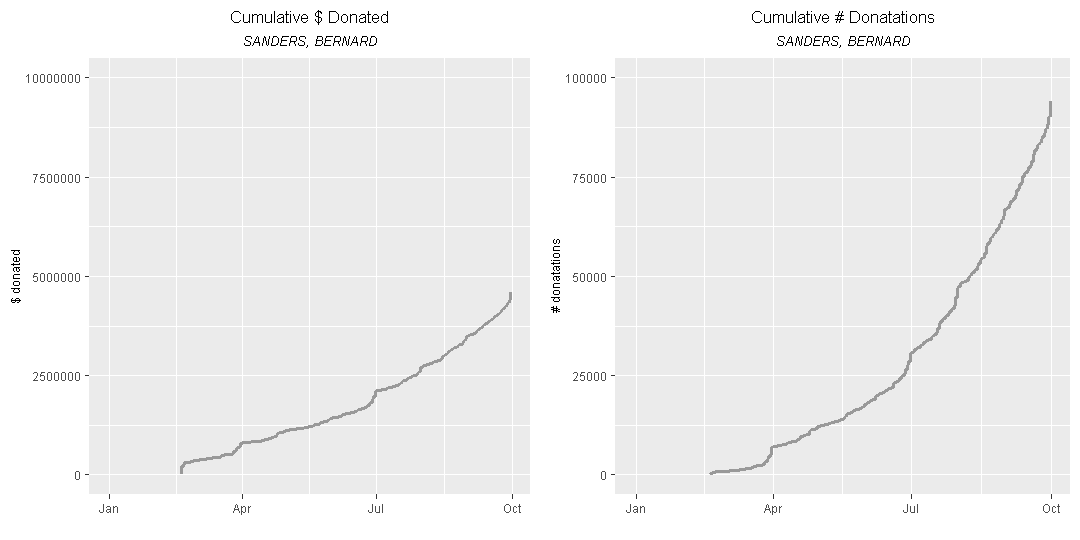

In [68]:
clock.start()

start_date = ymd("2019-01-01")
stop_date  = ymd("2019-09-30")

candidate = data.cand[order(data.cand$sum, decreasing=TRUE)[4],"CAND_NAME"] # 4th highest $ donated
data.who = data[data$CAND_NAME == candidate, ]

sum.pre = sum(data.who$TRANSACTION_AMT[data.who$TRANSACTION_DT < start_date])
count.pre = sum(data.who$count[data.who$TRANSACTION_DT < start_date])

data.who.since = data.who[data.who$TRANSACTION_DT >= start_date,]
data.who.since = data.who.since[order(data.who.since$TRANSACTION_DT),]
data.who.since$count = 1


p1 = ggplot(data.who.since) + xlim(start_date, stop_date) + 
     ggtitle("Cumulative $ Donated",candidate) + xlab("") + ylab("$ donated") + ylim(0,10000000) +
     geom_step(aes(x=TRANSACTION_DT, y=sum.pre+cumsum(TRANSACTION_AMT)), size=1, color="gray60")

p2 = ggplot(data.who.since) + xlim(start_date, stop_date) + 
     ggtitle("Cumulative # Donatations",candidate) + xlab("") + ylab("# donatations") + ylim(0,100000) +
     geom_step(aes(x=TRANSACTION_DT, y=count.pre+cumsum(count)), size=1, color="gray60")

grid.arrange(p1, p2, nrow=1)

clock.stop()

Time difference of 3.766885 secs


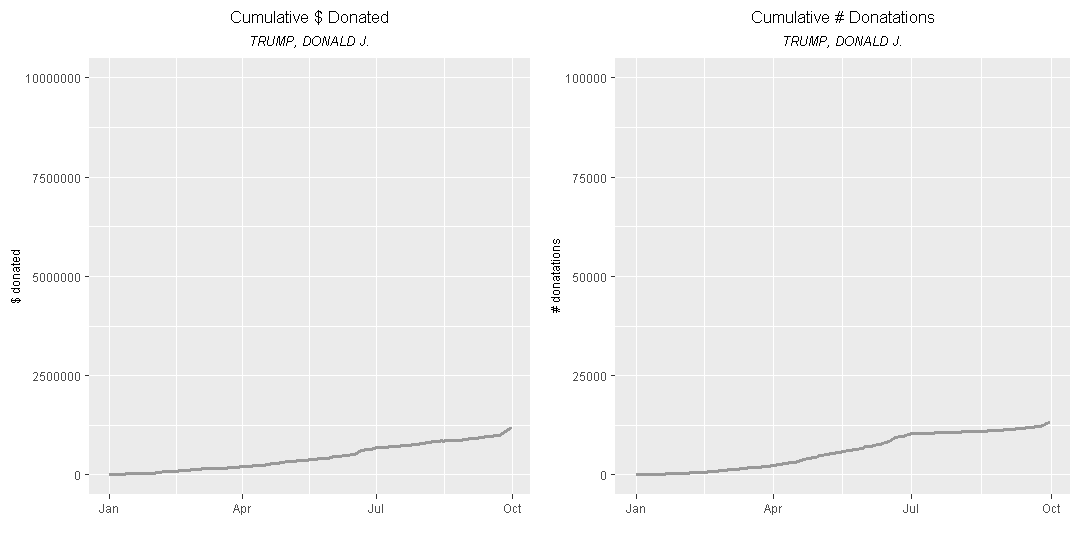

In [69]:
clock.start()

start_date = ymd("2019-01-01")
stop_date  = ymd("2019-09-30")

data.who = data[data$CAND_NAME == "TRUMP, DONALD J.", ]

sum.pre = sum(data.who$TRANSACTION_AMT[data.who$TRANSACTION_DT < start_date])
count.pre = sum(data.who$count[data.who$TRANSACTION_DT < start_date])

data.who.since = data.who[data.who$TRANSACTION_DT >= start_date,]
data.who.since = data.who.since[order(data.who.since$TRANSACTION_DT),]
data.who.since$count = 1


p1 = ggplot(data.who.since) + xlim(start_date, stop_date) + 
     ggtitle("Cumulative $ Donated","TRUMP, DONALD J.") + xlab("") + ylab("$ donated") + ylim(0,10000000) +
     geom_step(aes(x=TRANSACTION_DT, y=sum.pre+cumsum(TRANSACTION_AMT)), size=1, color="gray60")

p2 = ggplot(data.who.since) + xlim(start_date, stop_date) + 
     ggtitle("Cumulative # Donatations","TRUMP, DONALD J.") + xlab("") + ylab("# donatations") + ylim(0,100000) +
     geom_step(aes(x=TRANSACTION_DT, y=count.pre+cumsum(count)), size=1, color="gray60")

grid.arrange(p1, p2, nrow=1)

clock.stop()

## Discussion

* What insights do you get from the data that can inform your fundraising strategy?
* What will be your fundraising strategy?
* What other insights might you find with more data exploration?

<p style="text-align:left; font-size:10px;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float:right;">
Document revised January 4, 2021
</span>
</p>